### Compilação das bases de benefícios concedidos entre jan/2019 e dez/2020

In [1]:
# Carregando alguns módulos essenciais para trabalharmos os dados

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Algumas opções do Pandas boas para vermos muitas linhas e colunas de uma vez
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


In [2]:
#Lendo o arquivo tratado com os benefícios concedidos em 2019 e 2020
df_benef = pd.read_csv('benef_AcidenteTrabalho_sem_NaNs.csv',
                       header = 0,
                       names = ['competencia', 'especie', 'cid', 'cid.1', 'despacho',
                               'dt_nasc', 'sexo', 'clientela', 'mun_resid',
                               'vinculo_depend', 'forma_filiacao', 'uf', 'qt_sm_rmi'], 
                       index_col = 0,
                       encoding = None)

In [3]:
df_benef.head()

,competencia,especie,cid,cid.1,despacho,dt_nasc,sexo,clientela,mun_resid,vinculo_depend,forma_filiacao,uf,qt_sm_rmi
27,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M75,M75 Lesoes do Ombro,Concessao Normal,04/06/1978,Feminino,Urbano,02043-AL-Maceió,Filho,Empregado,Alagoas,1.000
33,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,T92,T92 Sequelas de Traum do Membro Super,Concessao Normal,16/04/1987,Masculino,Urbano,02043-AL-Maceió,Não Informado,Empregado,Alagoas,1.382
35,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,01/01/1969,Masculino,Urbano,02023-AL-Coruripe,Não Informado,Empregado,Alagoas,1.331
41,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,M544,M54.4 Lumbago c/Ciatica,Concessao Normal,10/10/1974,Masculino,Urbano,02003-AL-Arapiraca,Não Informado,Desempregado,Alagoas,1.461
47,janeiro/2019,Auxílio Doenca por Acidente do Trabalho,T922,T92.2 Sequelas de Frat ao Nivel do Punho e Da,Concessao Normal,19/05/1984,Masculino,Urbano,02043-AL-Maceió,Não Informado,Empregado,Alagoas,1.445


In [3]:
df_benef.shape

(268766, 13)

In [24]:
#Verificando o valor mensal de benefício segunda cada CID
df_benef.groupby(["cid"]).mean()

,qt_sm_rmi
cid,
00T932,1.141000
A000,1.000000
A001,1.203000
A04,1.065000
A09,1.082000
...,...
Z967,1.555000
Z97,1.000000
Z98,1.674886


### EDA dos dados de benefícios

In [4]:
#Criando uma tabela com a distribuíção dos CID
df_cid = df_benef.groupby(["cid"]).describe()


In [25]:
df_benef.groupby(["cid"]).describe()

qt_sm_rmi                                                            
           count      mean       std    min      25%     50%      75%    max
cid                                                                         
00T932       1.0  1.141000       NaN  1.141  1.14100  1.1410  1.14100  1.141
A000         1.0  1.000000       NaN  1.000  1.00000  1.0000  1.00000  1.000
A001         1.0  1.203000       NaN  1.203  1.20300  1.2030  1.20300  1.203
A04          1.0  1.065000       NaN  1.065  1.06500  1.0650  1.06500  1.065
A09          1.0  1.082000       NaN  1.082  1.08200  1.0820  1.08200  1.082
...          ...       ...       ...    ...      ...     ...      ...    ...
Z967         1.0  1.555000       NaN  1.555  1.55500  1.5550  1.55500  1.555
Z97          1.0  1.000000       NaN  1.000  1.00000  1.0000  1.00000  1.000
Z98         79.0  1.674886  0.636457  1.000  1.21850  1.5480  2.01500  4.136
Z981        18.0  1.838167  0.607348  1.000  1.31375  1.8000  2.22575  2.813
Z988        40.0  1.733175  0.716004  1.000  1.03950  1.5685  2.07400  3.245

[2943 rows x 8 columns]

<AxesSubplot:ylabel='Count'>

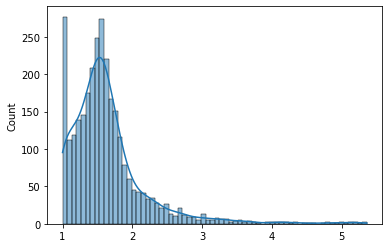

In [46]:
#Distribuição dos valores médios de qt_sm_rmi dos CIDs
sns.histplot(x=df_cid['qt_sm_rmi','mean'].values, kde=True)

<AxesSubplot:ylabel='Count'>

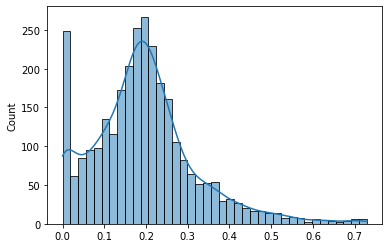

In [48]:
#Distribuição dos logs dos valores médios de qt_sm_rmi dos CIDs
sns.histplot(x=np.log10(df_cid['qt_sm_rmi','mean'].values), kde=True)

In [87]:
#Distribuição das contagens de ocorrências dos CIDs
df_cid.iloc[:,0].values

array([ 1.,  1.,  1., ..., 79., 18., 40.])

In [96]:
df_cid.index.values

array(['00T932', 'A000', 'A001', ..., 'Z98', 'Z981', 'Z988'], dtype=object)

In [5]:
df_aux = pd.DataFrame(data = df_cid.index.values, index = None, columns = ['cid'])

In [6]:
df_aux['count'] = df_cid.iloc[:,0].values

In [7]:
df_aux.sort_values('count', ascending = False).head(100)

,cid,count
2140,S626,13862.0
2076,S525,7501.0
1502,M75,7144.0
2133,S62,6638.0
1504,M751,6549.0
1427,M545,6323.0
2327,S923,6035.0
2258,S82,4871.0
526,G560,4676.0
1426,M544,4573.0


In [17]:
len(df_aux)

2943

In [16]:
len(df_aux[df_aux['count'] == 1])

890

In [19]:
len(df_aux[df_aux['count'] > 100])

278

#### Verificando se há correlação entre as outras features da relação de benefícios

In [22]:
df_benef.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268766 entries, 27 to 10103479
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   competencia     257026 non-null  object 
 1   especie         268766 non-null  object 
 2   cid             268766 non-null  object 
 3   cid.1           199859 non-null  object 
 4   despacho        268766 non-null  object 
 5   dt_nasc         268766 non-null  object 
 6   sexo            268766 non-null  object 
 7   clientela       137295 non-null  object 
 8   mun_resid       268766 non-null  object 
 9   vinculo_depend  268766 non-null  object 
 10  forma_filiacao  268766 non-null  object 
 11  uf              268766 non-null  object 
 12  qt_sm_rmi       268766 non-null  float64
dtypes: float64(1), object(12)
memory usage: 28.7+ MB


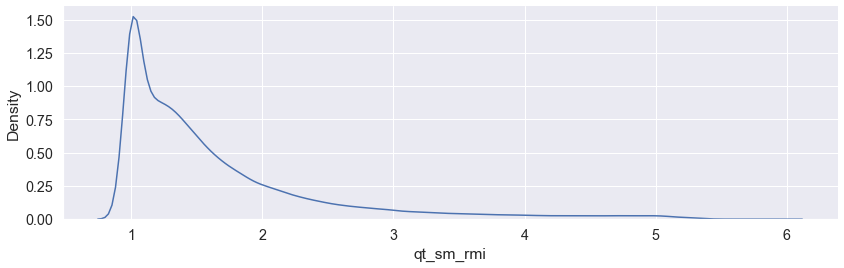

In [23]:
#Verificando o comportamento da variável de interesse qt_sm_rmi
sns.set(font_scale = 1.3) # Para aumentar o tamanho da fonte
coluna = 'qt_sm_rmi' # Coluna a ser representada

# Instanciando o Displot. Só precisamos da coluna que queremos representar
sns.displot(
    df_benef[coluna], #Dados a serem representados. Selecionamos apenas a coluna de interesse
    height=4, # Altura em polegadas do gráfico
    aspect=3, # Proporção entre largura e altura do gráfico. Números > 1 representam retâgulos mais 'deitados'
    kind='kde',

)
plt.show()

In [24]:
#Selecionndo as variáveis qualitativas
var_quali=[]
for x in range(len(df_benef.dtypes)):
    if df_benef.dtypes.values[x] == "O":
        var_quali.append(df_benef.columns.values[x])

In [25]:
var_quali

['competencia',
 'especie',
 'cid',
 'cid.1',
 'despacho',
 'dt_nasc',
 'sexo',
 'clientela',
 'mun_resid',
 'vinculo_depend',
 'forma_filiacao',
 'uf']

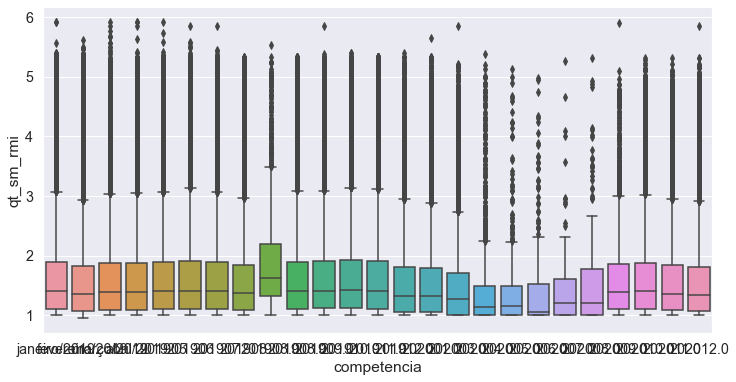

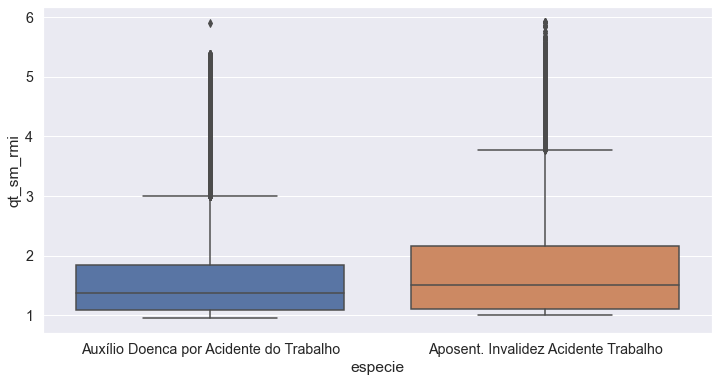

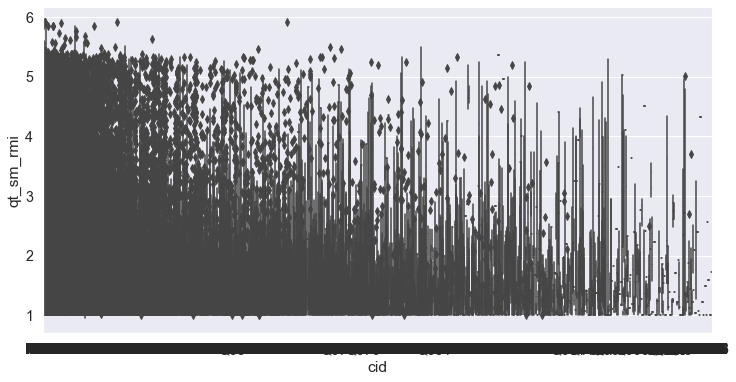

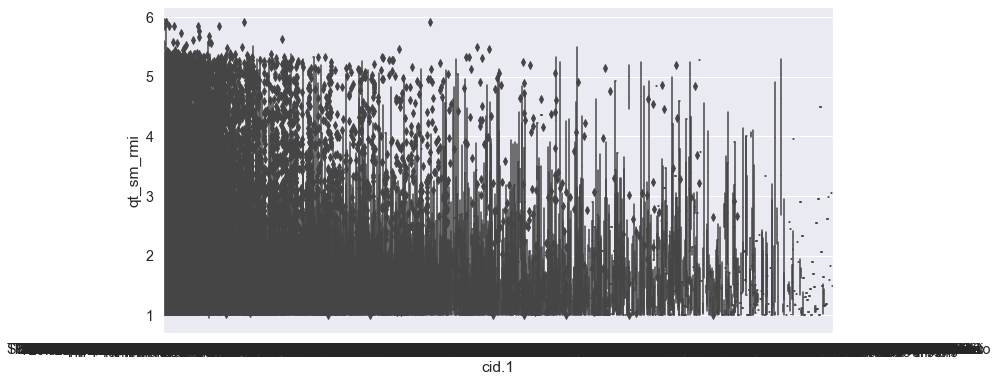

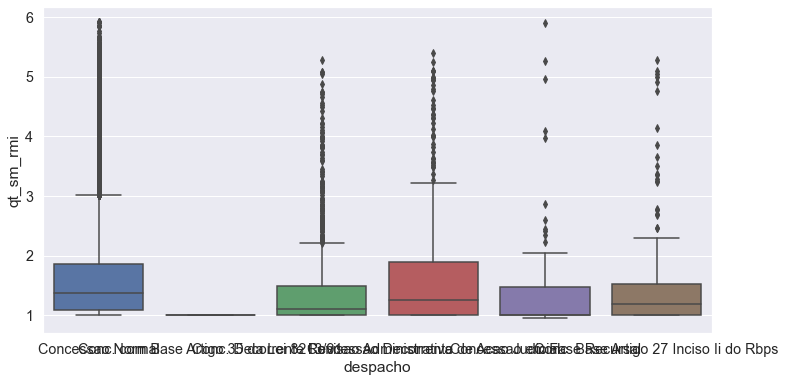

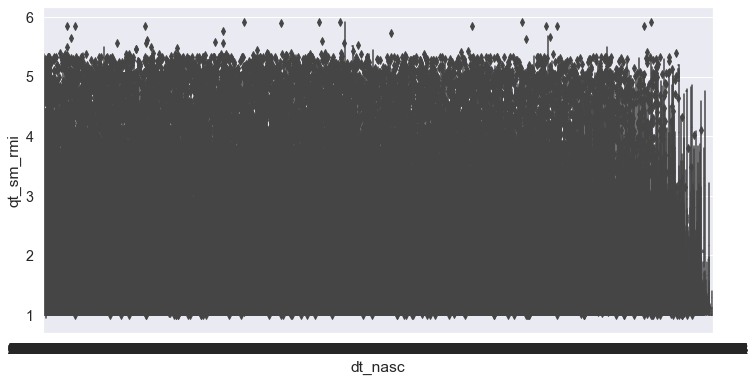

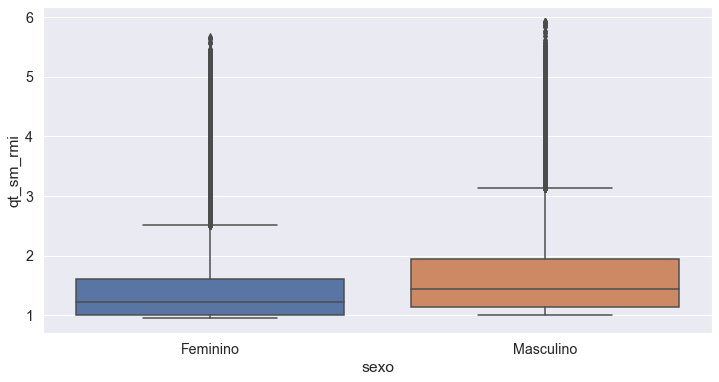

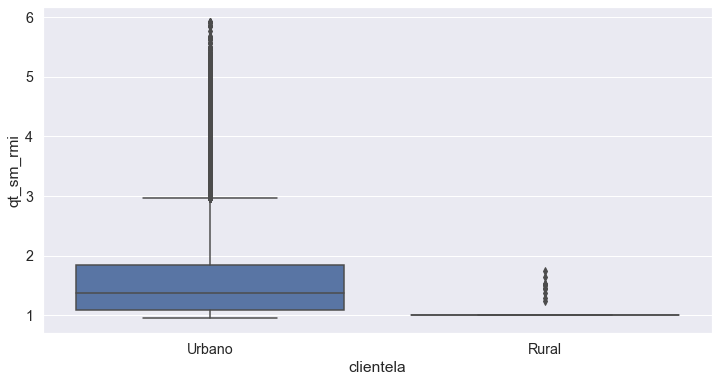

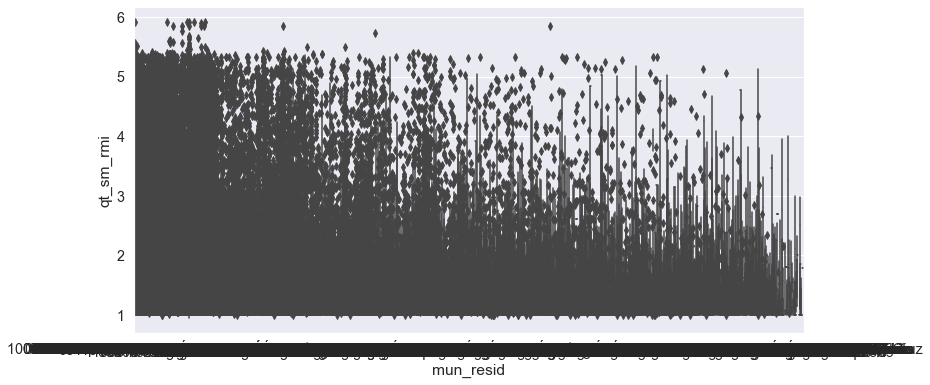

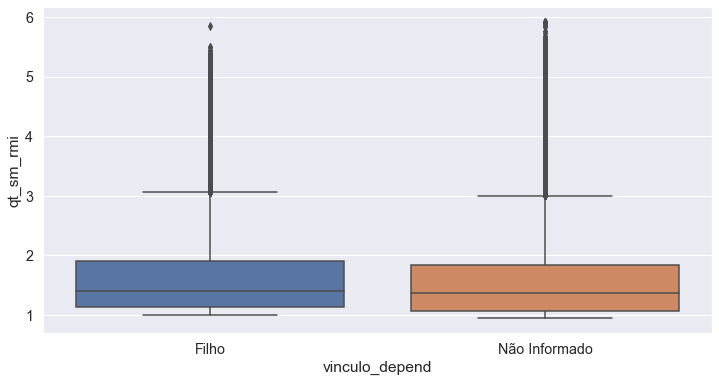

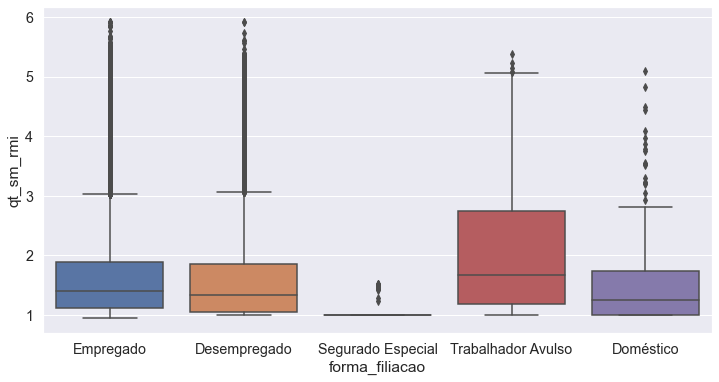

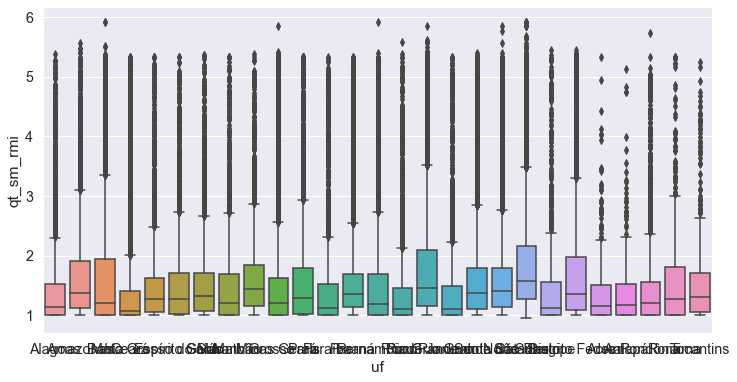

In [26]:
#Plotando gráficos das variáveis qualitativas
for i in var_quali:
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data = df_benef,
        x = i, # Coluna para o eixo X
        y = 'qt_sm_rmi', # Coluna para o eixo Y
        orient = 'v'
    )
    plt.show()

#### Conclusão:
###### As medianas dos valores de benefícios concedidos não parecem variar muito com as variáveis categóricas 

In [32]:
#Preparando arquivo com as medianas dos valores de benefícios concedidos por cada CID
df_export = pd.DataFrame(data = df_cid.index.values, index = None, columns = ['cid'])
df_export['median_qt_sm'] = df_benef.groupby(["cid"]).median().values


In [33]:
df_export

,cid,median_qt_sm
0,00T932,1.1410
1,A000,1.0000
2,A001,1.2030
3,A04,1.0650
4,A09,1.0820
...,...,...
2938,Z967,1.5550
2939,Z97,1.0000
2940,Z98,1.5480
2941,Z981,1.8000


In [34]:
df_export.to_csv('median_sm_x_CID.csv')